**1. Describe the data used and how you got the data.** <br>
Answer: The train dataset has 12 columns and 891 entries. The columns represts different attributes and features for the passengers such as name,age,ticket,fare,parents-child, siblings-spouse etc. The 'Survived' column will specify if a passenger survived or not. This will be the final output label. 0 = Did not survive, 1 = Survived <br>
This data set is a common begginer level dataset found in kaggle. The link of the dataset was posted in our Assignment 1 pdf. I got it from there. Here is the link of the [Dataset](https://www.kaggle.com/c/titanic/data?select=train.csv)

In [913]:
# Uploading the Train .csv file of the dataset
from google.colab import files
  
  
uploaded = files.upload()

Saving test.csv to test (12).csv


In [914]:
# Uploading the Test .csv file of the dataset
from google.colab import files
  
  
uploaded = files.upload()

Saving train.csv to train (11).csv


**Importing Necessary Libraries**

In [915]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [916]:
#loading the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

**2. Printing data**

In [917]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [918]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [919]:
# Printing first 5 datas
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [920]:
#Printing last 5 datas
train_df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**2. Initial Exploration of the data (print data, visualize data). Find number of attributes, number of records in the data. Also find if there is any attribute which has missing data.**<br>

In [921]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We hace some null columns and 3 data types

In [922]:
#counting the datas
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [923]:
#finding the shape of the data
print("The Shape of the trainset:",train_df.shape)
print("The Shape of the testset:",test_df.shape)

The Shape of the trainset: (891, 12)
The Shape of the testset: (418, 11)


We can see the train data set has 891 entries and 12 columns and test dataset has 418 entries and 11 columns.

In [924]:
#Describe the dataset
train_df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [925]:
test_df.describe

<bound method NDFrame.describe of      PassengerId  Pclass  ... Cabin Embarked
0            892       3  ...   NaN        Q
1            893       3  ...   NaN        S
2            894       2  ...   NaN        Q
3            895       3  ...   NaN        S
4            896       3  ...   NaN        S
..           ...     ...  ...   ...      ...
413         1305       3  ...   NaN        S
414         1306       1  ...  C105        C
415         1307       3  ...   NaN        S
416         1308       3  ...   NaN        S
417         1309       3  ...   NaN        C

[418 rows x 11 columns]>

In [926]:
#number of null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see age,cabin, embarked columns have null values <br>
177 null in Age Column <br>
687 null in Cabin column <br>
2 null in Embarked

In [927]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Test dataset has age and cabin null values. <br>
86 null values in age column <br>
327 in cabin column

**3 Find correlation of data attributes and target variable** (whether survived or not) to explore which attributes have most effects on output (target
variable). <br>
Answer: We need to find relation between attributes to predict survival.

We can see there are about 580 males and 310 female passengers.

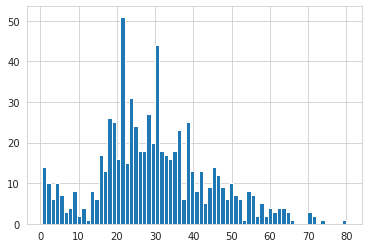

In [928]:
#Plotting age
train_df['Age'].hist(bins=70)

We can see most of the passengers are from 20-40 years of age

In [929]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

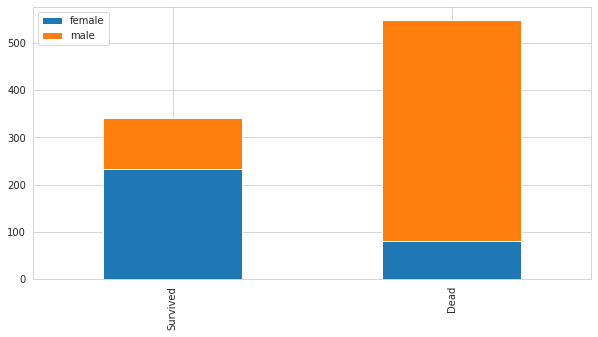

In [930]:
bar_chart('Sex')

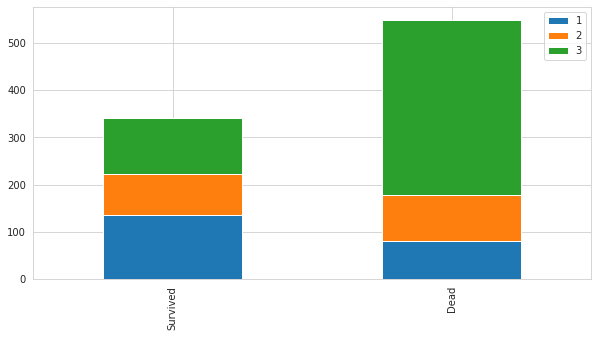

In [931]:
bar_chart('Pclass')


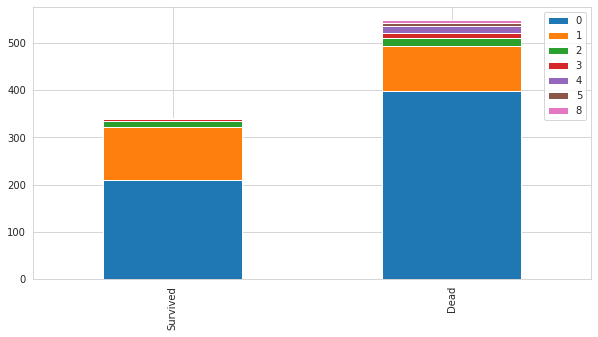

In [932]:
bar_chart('SibSp')

We can see <br> 1.28 age survived more because they are younger. <br> 2.People who paid more survived because of their first class cabins. <br> 3. Kids survived because they were with parents <br> Child that has siblings has less chance.

1. Only around 300 people survived. <br>
2. Majority passenger had 3rd class cabin. <br>
3. There were more males than females..

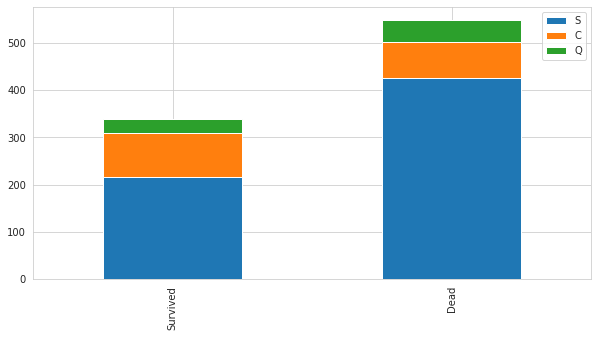

In [933]:
bar_chart('Embarked')

a person aboarded from C slightly more likely survived

**4.Compute any new attribute/feature from existing attributes [if necessary].
Explain how these new features contribute to the prediction of target
variable.**<br>

In [934]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [935]:
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)

In [936]:
train_test_data = [train_df, test_df]

In [937]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [938]:
test_df.head(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [939]:
#replacing make with 0, female with 1 in sex column
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [940]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


In [941]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [942]:
#filling null age with mean
train_df["Age"].fillna(train_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)
test_df["Age"].fillna(test_df.groupby("Pclass")["Age"].transform("mean"), inplace=True)

In [943]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S


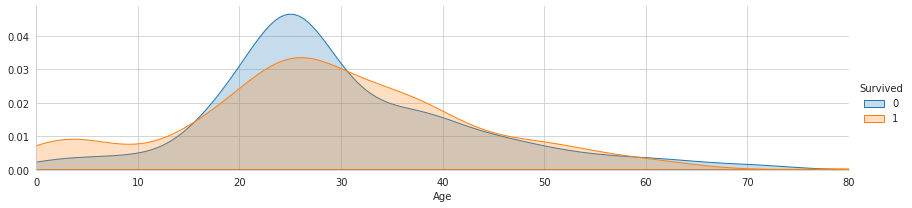

In [944]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
 
plt.show()

In [945]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [946]:
#child: 0, young: 1, adult: 2 ,mid-age: 3 ,senior: 4
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0

In [947]:
for dataset in train_test_data:
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1

In [948]:
for dataset in train_test_data:
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2

In [949]:
for dataset in train_test_data:
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3

In [950]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [951]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S


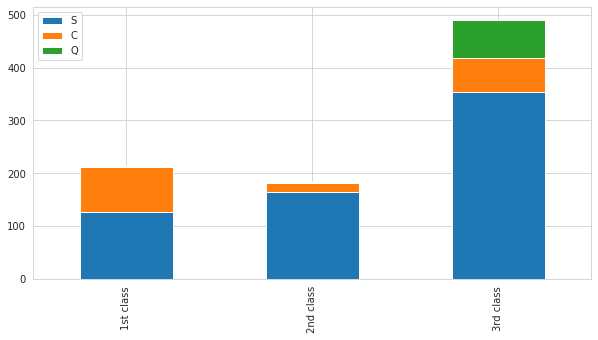

In [952]:
Pclass1 = train_df[train_df['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [953]:
#filling missing value with "S" because it has over 50% value
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [954]:
#replaced embarked "S": 0, "C": 1, "Q": 2
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [955]:
#fill missing fare with mean
train_df["Fare"].fillna(train_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_df["Fare"].fillna(test_df.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0


In [956]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0

In [957]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1

In [958]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2

In [959]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [960]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0


In [961]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

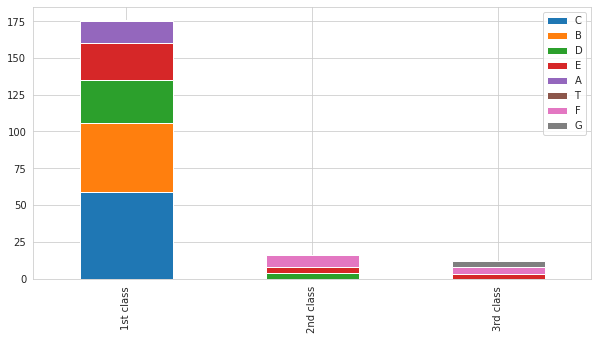

In [962]:
Pclass1 = train_df[train_df['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_df[train_df['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_df[train_df['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [963]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [964]:
train_df["Cabin"].fillna(train_df.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)
test_df["Cabin"].fillna(test_df.groupby("Pclass")["Cabin"].transform("mean"), inplace=True)

In [965]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [966]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [967]:
train_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.033333,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.800000,1,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.033333,0,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.800000,0,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.033333,0,0.0


In [968]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train_df.drop(features_drop, axis=1)
test = test_df.drop(features_drop, axis=1)
train = train_df.drop(['PassengerId'], axis=1)

In [969]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 10), (891,))

In [970]:
train_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,3,0,1.0,1,0,A/5 21171,0.0,2.033333,0,0.4
1,1,1,3.0,1,0,PC 17599,2.0,0.800000,1,0.4
2,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.033333,0,0.0
3,1,1,2.0,1,0,113803,2.0,0.800000,0,0.4
4,3,0,2.0,0,0,373450,0.0,2.033333,0,0.0


In [971]:
train = train_df.drop(['Ticket'], axis=1)
train = train_df.drop(['SibSp'], axis=1)

In [972]:
train_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,3,0,1.0,1,0,A/5 21171,0.0,2.033333,0,0.4
1,1,1,3.0,1,0,PC 17599,2.0,0.800000,1,0.4
2,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.033333,0,0.0
3,1,1,2.0,1,0,113803,2.0,0.800000,0,0.4
4,3,0,2.0,0,0,373450,0.0,2.033333,0,0.0


In [973]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 10), (891,))

In [974]:
train_data.head(5)

,PassengerId,Pclass,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,3,0,1.0,0,A/5 21171,0.0,2.033333,0,0.4
1,2,1,1,3.0,0,PC 17599,2.0,0.800000,1,0.4
2,3,3,1,1.0,0,STON/O2. 3101282,0.0,2.033333,0,0.0
3,4,1,1,2.0,0,113803,2.0,0.800000,0,0.4
4,5,3,0,2.0,0,373450,0.0,2.033333,0,0.0


In [975]:
train_data = train_data.drop('Ticket', axis=1)

In [976]:
train_data.head(5)

,PassengerId,Pclass,Sex,Age,Parch,Fare,Cabin,Embarked,FamilySize
0,1,3,0,1.0,0,0.0,2.033333,0,0.4
1,2,1,1,3.0,0,2.0,0.800000,1,0.4
2,3,3,1,1.0,0,0.0,2.033333,0,0.0
3,4,1,1,2.0,0,2.0,0.800000,0,0.4
4,5,3,0,2.0,0,0.0,2.033333,0,0.0


In [977]:
train_data = train_data.drop('PassengerId', axis=1)

In [978]:
train_data = train_data.drop('Embarked', axis=1)

In [979]:
train_data = train_data.drop('Parch', axis=1)

In [980]:
train_data.head(5)

,Pclass,Sex,Age,Fare,Cabin,FamilySize
0,3,0,1.0,0.0,2.033333,0.4
1,1,1,3.0,2.0,0.800000,0.4
2,3,1,1.0,0.0,2.033333,0.0
3,1,1,2.0,2.0,0.800000,0.4
4,3,0,2.0,0.0,2.033333,0.0


In [981]:
target.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [982]:
train_data.head(1)

,Pclass,Sex,Age,Fare,Cabin,FamilySize
0,3,0,1.0,0.0,2.033333,0.4


**5. Select your classification model (try at least three model to find best one)** <br>
Answer: KNeighborsClassifier,Decision Tree, Random Forest, Support Vector Machine these four models will be used to classify the dataset.

**6. Calculate confusion matrix and show classification report using Scikit-learn library** <br>
Answer: Classification report and confusion matrix.

In [983]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

**Assignment 2<br>Cross Validation**

In [984]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

Deciding Which Model Will Be Best

**KNeighbours**

In [985]:
knc = KNeighborsClassifier(n_neighbors = 13)
knc.fit(train_data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [986]:
y_train_predict=knc.predict(train_data)

**Confusion Matrix**

Accuracy for training set is:  0.8294051627384961
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       549
           1       0.81      0.72      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891





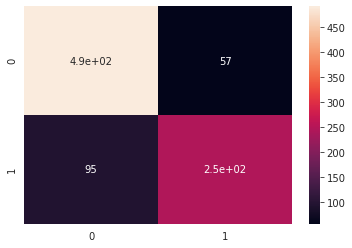

In [987]:
print('Accuracy for training set is: ',accuracy_score(target,y_train_predict))
print(classification_report(target,y_train_predict))

print("\n")

#Get the confusion matrix
cf_matrix = confusion_matrix(target,y_train_predict)
sns.heatmap(cf_matrix, annot=True)

**Decision Tree**

In [988]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.78651685 0.7752809  0.73033708 0.85393258 0.79775281
 0.78651685 0.80898876 0.74157303 0.82022472]


In [989]:
round(np.mean(score)*100, 2)

79.23

**Implementing GridSearchCV to find Max_depth and to see improved accuracy**

In [990]:
model = DecisionTreeClassifier()

In [991]:
parameters = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5]
}

In [992]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(estimator = model,
param_grid = parameters,
scoring = 'accuracy',
cv = 5,
verbose = 1)

In [993]:
grid_search_dt.fit(train_data, target)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 36000 out of 36000 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [994]:
print(grid_search_dt.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')


In [995]:
print(grid_search_dt.score(train_data, target))

0.8484848484848485


By implementing GriSearchCV the accuracy improved from 78.9 to 84.84 . 

**Random Forest**

In [996]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.83146067 0.7752809  0.76404494 0.83146067 0.80898876
 0.79775281 0.78651685 0.7752809  0.82022472]


In [997]:
round(np.mean(score)*100, 2)

80.13

**Using GridSearchCv for Random Forest**

In [998]:
modelRF = RandomForestClassifier()
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 5, 10, 17],
    'criterion' :['gini', 'entropy']
}
grid_search_rf = GridSearchCV(estimator = modelRF,
param_grid = param_grid,
scoring = 'accuracy',
cv = 5,
verbose = 1)
grid_search_rf.fit(train_data, target)
print(grid_search_rf.best_estimator_)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [999]:
print("With Grid Search: ",grid_search_rf.score(train_data, target))

With Grid Search:  0.8406285072951739


The accuracy increased after using GridSearchCV from 79.68 to 83.95

In [1000]:
train_data.head(5)

,Pclass,Sex,Age,Fare,Cabin,FamilySize
0,3,0,1.0,0.0,2.033333,0.4
1,1,1,3.0,2.0,0.800000,0.4
2,3,1,1.0,0.0,2.033333,0.0
3,1,1,2.0,2.0,0.800000,0.4
4,3,0,2.0,0.0,2.033333,0.0


**Using PCA to find if accuracy changes**

In [1001]:
df_1 = train_data.loc[:,['Fare','Pclass']]
df_2 = test_df.loc[:,['Fare','Pclass']]

In [1002]:
from sklearn.decomposition import PCA
pca =  PCA(n_components=1)
col_1 = pca.fit_transform(df_1)
col_2 = pca.fit_transform(df_2)

train_data['Mod_col_1']=col_1[:,0]
test_df['Mod_col_1']=col_2[:,0]


In [1003]:
train_data.head(1)

,Pclass,Sex,Age,Fare,Cabin,FamilySize,Mod_col_1
0,3,0,1.0,0.0,2.033333,0.4,-1.029812


In [1004]:
train_data=train_data.drop(['Fare','Pclass'], axis=1)
test_df=test_df.drop(['Fare','Pclass'], axis=1)

In [1005]:
test_df.head(1)

,PassengerId,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,FamilySize,Mod_col_1
0,892,0,2.0,0,0,330911,2.1,2,0.0,-1.059941


In [1006]:
train_data.shape

(891, 5)

In [1007]:
modelRF = RandomForestClassifier()
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 5, 10, 17],
    'criterion' :['gini', 'entropy']
}
grid_search_rf = GridSearchCV(estimator = modelRF,
param_grid = param_grid,
scoring = 'accuracy',
cv = 5,
verbose = 1)
grid_search_rf.fit(train_data, target)
print(grid_search_rf.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  3.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [1008]:
print("With Grid Search: ",grid_search_rf.score(train_data, target))

With Grid Search:  0.8406285072951739


Accuracy increased after using PCA is this dataset from 83.95 to 84.28

**Support Vector Machine**

In [1009]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.78651685 0.79775281 0.78651685 0.80898876 0.78651685
 0.7752809  0.83146067 0.82022472 0.82022472]


In [1010]:
round(np.mean(score)*100,2)

80.25

**RandomForestClassifier Had the most accuracy. Now, we can save for submission**

In [1011]:
test_data = test_df.drop('Ticket', axis=1)

In [1012]:
test_data = test_data.drop('Embarked', axis=1)

In [1013]:
test_data = test_data.drop('SibSp', axis=1)

In [1014]:
test_data = test_data.drop('Parch', axis=1)

In [1015]:
test_data

,PassengerId,Sex,Age,Cabin,FamilySize,Mod_col_1
0,892,0,2.0,2.100000,0.0,-1.059941
1,893,1,3.0,2.100000,0.4,-1.059941
2,894,0,3.0,1.771429,0.0,-0.438528
3,895,0,2.0,2.100000,0.0,-1.059941
4,896,1,1.0,2.100000,0.8,-1.059941
...,...,...,...,...,...,...
413,1305,0,1.0,2.100000,0.0,-1.059941
414,1306,1,3.0,0.800000,0.0,2.533335
415,1307,0,3.0,2.100000,0.0,-1.059941
416,1308,0,1.0,2.100000,0.0,-1.059941


In [1016]:

test_data = test_data.drop("PassengerId", axis=1).copy()


In [1017]:
test_data['Cabin'] = test_data['Cabin'].round(decimals = 1)

In [1018]:
test_data.fillna(0.0, inplace = True)

In [1019]:
test_data.head(1)

,Sex,Age,Cabin,FamilySize,Mod_col_1
0,0,2.0,2.1,0.0,-1.059941


In [1020]:
prediction = grid_search_rf.predict(test_data)

In [1026]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

**Submission File**

In [1027]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
